# 생선 길이로 무게 예측 

- 회귀 (regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관게를 분석하는 방법 
    
    
- KNN 회귀
    1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개 선택
    2. k개의 샘플의 종속변수 값의 평균 구함. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # 평균 절대 오차 

# 1. 데이터 준비

In [2]:
df = pd.read_csv('FISH.csv')

# 농어 데이터만 사용
df = df.loc[df['Species']=='Perch', ['Species','Length2','Weight']]
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


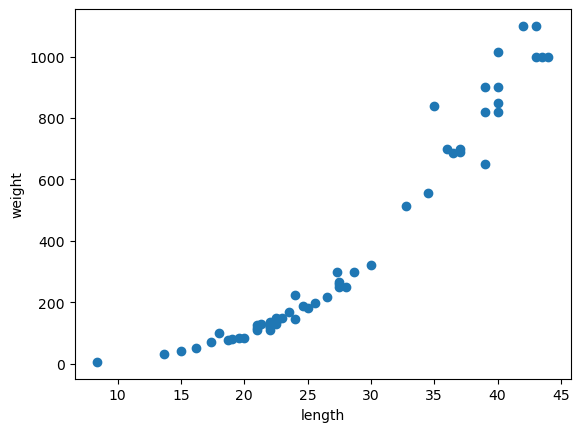

In [3]:
plt.figure()

plt.scatter(df['Length2'], df['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이가 커짐에 따라 무게가 점점 증가하는 경향이 있음.

# 2. 데이터 분할 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df['Length2'], 
                                                    df['Weight'],
                                                   test_size=0.25,
                                                   random_state=4)

print(len(x_train), len(y_train), len(x_test), len(y_test))

42 42 14 14


In [6]:
x_train.values

array([32.8, 24.6, 22. , 22. , 23. , 27.5, 22. , 26.5, 22. , 36. , 25. ,
       27.5, 43. , 21.3, 21. , 22.5, 28. , 40. , 42. , 39. , 40. , 44. ,
       15. , 40. , 40. , 22.7,  8.4, 16.2, 37. , 34.5, 30. , 43. , 27.3,
       39. , 35. , 20. , 19.6, 23.5, 36.5, 13.7, 18. , 39. ])

- 컴퓨터에겐 독립변수가 몇개 들어간다는 것을, 2차원 데이터 형식으로 알려줌. 
- 그냥은 이 데이터가 한줄인건지, 아니면 여러줄의 데이터들이 있는건지 모름.
    - 독립변수는 반드시 2차원 배열이어야 함. 

In [7]:
x_train = np.reshape(x_train.values, (-1,1))
x_train

array([[32.8],
       [24.6],
       [22. ],
       [22. ],
       [23. ],
       [27.5],
       [22. ],
       [26.5],
       [22. ],
       [36. ],
       [25. ],
       [27.5],
       [43. ],
       [21.3],
       [21. ],
       [22.5],
       [28. ],
       [40. ],
       [42. ],
       [39. ],
       [40. ],
       [44. ],
       [15. ],
       [40. ],
       [40. ],
       [22.7],
       [ 8.4],
       [16.2],
       [37. ],
       [34.5],
       [30. ],
       [43. ],
       [27.3],
       [39. ],
       [35. ],
       [20. ],
       [19.6],
       [23.5],
       [36.5],
       [13.7],
       [18. ],
       [39. ]])

In [10]:
x_test = np.reshape(x_test.values, (-1,1))

# 3. 모델 훈련

In [12]:
knr = KNeighborsRegressor()

knr.fit(x_train, y_train)

KNeighborsRegressor()

# 4. 모델 평가

- 회귀 모델은 정확도 지표를 쓸 수 없음. 
- 딱 "정확히" 맞추는 것이 있을 수 없으니까.


## 4-1. 결정 계수
- 계산식 : 1 - ((sum((타깃 - 예측)^2)) / (sum((타깃 - 타깃 평균)^2)))
- 모델의 설명력을 뜻함. 
    - 전체 변화량의 얼마 정도는 따라 갈 수 있다. 
    - 평균보다 어느 정도는 데이터에 근접하게 예측하고 있다. 
- 1에 가까울수록 모델 성능이 좋음. 
    - 예측이 타깃과 일치하면, 분자가 0

In [13]:
knr.score(x_test, y_test)

0.9916188730818064

- 분류인지, 회귀 모델인지에 따라 .score 했을때 나오는 결과가 다르다 ! 
    - 분류 : 1.0
    - 회귀 : 0.9.....

## 4-2) mean_absolute_error
- 타깃과 예측값의 절대값 오차를 평균하여 반환 

In [14]:
pred = knr.predict(x_test)
pred

array([  72.3,  138. , 1010. ,  166.6,  125. ,  227.2,  276. ,  255.6,
         86.3,  727. ,  102. ,  166.6,  125. ,  125. ])

In [15]:
mae = mean_absolute_error(y_test, pred)
mae

17.871428571428574

In [18]:
pred_df = pd.DataFrame({'ans':y_test, 'pred':pred})
pred_df

,ans,pred
76,70.0,72.3
92,150.0,138.0
126,1000.0,1010.0
96,225.0,166.6
84,125.0,125.0
100,197.0,227.2
107,300.0,276.0
104,265.0,255.6
78,78.0,86.3
115,690.0,727.0


# <KNN 의 문제점> 

<img src = "KNN_VS_LINEAR.png">

- 최소값에서 최대값 사이의 값밖에 예측하지 못함.  
- 만약에 학습 데이터의 범위를 초과해서, 길이 90짜리 데이터의 무게를 예측하고자 한다면,
    - 그 최대값 쪽 점들을 골라서 그 평균을 내어서 그 이상의 값을 내지 못함. (쭉 빨간점)

In [20]:
max(x_train), max(y_train)

(array([44.]), 1100.0)

In [21]:
knr.predict([[50], [60], [70], [80]])

array([1010., 1010., 1010., 1010.])

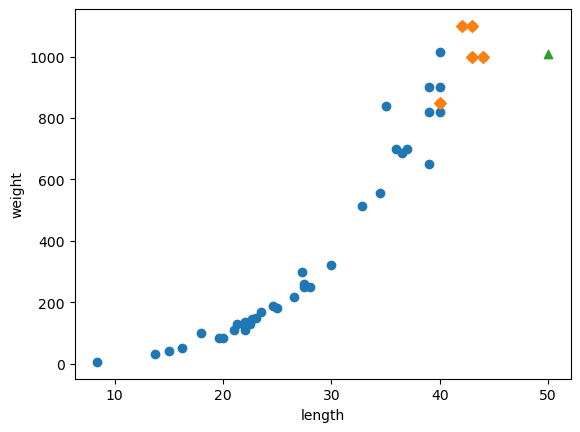

In [22]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker='D')
plt.scatter(50, 1010, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()